# Linear regression
In this notebook, we do regression for the problem of predicting mean activity based on non-wearable features taken from the UK biobank. We use the L1 and L2 norms, hence we use elastic-net.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

In [2]:
from accel.constants import DATA_DIR
from accel.read_data import prep_data

## Data prep

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test, means_modes = prep_data(DATA_DIR / "shared/eliminated-missing-participants.csv",
                                                                        normalise = True,
                                                                        one_hot = True)

## Model

In [119]:
from sklearn.linear_model import ElasticNet, LinearRegression 
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error

Since we only have two parameters to search through, we can do a random-search for a number of iterations and then plot the results in 2D. The objective function is:
$$
        1 / (2 \cdot n_\text{samples}) \cdot ||y - Xw||^2_2 \\
        + \text{alpha} * \text{l1_ratio} \cdot ||w||_1  \\
        + 0.5 * \text{alpha} * (1 - \text{l1_ratio}) \cdot ||w||^2_2
$$
When the l1_ratio is close to 1, we have mainly l1 regularisation.

In [ ]:
np.random.seed(42) # set seed

In [ ]:
alphas = []
l1_ratios = []
r2_scores = []
mse_scores = []
its = 100

In [93]:
for i in range(its):
    alpha = np.random.exponential(0.1) # random exponentially distributed number
    l1_ratio = np.random.uniform(0, 1) # random uniform number between 0 and 1
    print(i,np.round(alpha,4),np.round(l1_ratio,4), end=", ")
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    # do 5-fold CV and record r2 and MSE 
    results = cross_validate( ElasticNet(alpha=alpha, l1_ratio=l1_ratio), X_train, y_train, cv=5,
                            scoring = ('r2', 'neg_mean_squared_error'))
    r2_scores.append(results['test_r2'])
    mse_scores.append(-results['test_neg_mean_squared_error'])

0 0.0233 0.0265, 1 0.1217 0.9106, 2 0.0478 0.5903, 3 0.1486 0.3628, 4 0.1442 0.1401, 5 0.0637 0.1821, 6 0.078 0.6335, 7 0.0548 0.1323, 8 0.0019 0.9143, 

/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.537e+02, tolerance: 4.196e+02
  model = cd_fast.enet_coordinate_descent(
/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.461e+02, tolerance: 4.223e+02
  model = cd_fast.enet_coordinate_descent(
/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

9 0.007 0.4052, 10 0.0011 0.1369, 11 0.0289 0.6331, 12 0.0543 0.3831, 13 0.3185 0.1844, 14 0.0493 0.2887, 15 0.0943 0.9493, 16 0.1319 0.2149, 17 0.1842 0.8464, 18 0.1474 0.1066, 19 0.1221 0.5983, 20 0.1607 0.6947, 21 0.0378 0.8074, 22 0.0591 0.1851, 23 0.1019 0.759, 24 0.0287 0.4894, 25 0.1108 0.0442, 26 0.0839 0.9155, 27 0.0214 0.1153, 28 0.1981 0.8445, 29 0.105 0.3647, 30 0.1192 0.3399, 31 0.163 0.5384, 32 0.2171 0.6159, 33 0.464 0.0002, 34 0.1603 0.9979, 35 0.0038 0.4798, 36 0.1462 0.4178, 37 0.0003 0.4673, 

/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.638e+04, tolerance: 4.256e+02
  model = cd_fast.enet_coordinate_descent(
/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.577e+04, tolerance: 4.197e+02
  model = cd_fast.enet_coordinate_descent(
/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

38 0.0266 0.0421, 39 0.0116 0.3916, 40 0.1543 0.0894, 41 0.0918 0.9037, 42 0.0264 0.9427, 43 0.0128 0.0469, 44 0.1512 0.3501, 45 0.073 0.5973, 46 0.142 0.696, 47 0.0975 0.7479, 48 0.0096 0.8775, 49 0.0045 0.8522, 50 0.08 0.087, 51 0.119 0.0488, 52 0.115 0.0761, 53 0.0726 0.9065, 54 0.0834 0.267, 55 0.0281 0.1573, 56 0.1196 0.6801, 57 0.2134 0.9613, 58 0.0138 0.3351, 59 0.0812 0.7566, 60 0.096 0.9812, 61 0.0009 0.8187, 

/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+03, tolerance: 4.256e+02
  model = cd_fast.enet_coordinate_descent(
/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+03, tolerance: 4.197e+02
  model = cd_fast.enet_coordinate_descent(
/cdthome/pkd542/.conda/envs/accel/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

62 0.0779 0.963, 63 0.1401 0.7888, 64 0.0358 0.7082, 65 0.006 0.0747, 66 0.347 0.7497, 67 0.0068 0.8215, 68 0.115 0.4459, 69 0.0108 0.8542, 70 0.0249 0.0824, 71 0.2025 0.9632, 72 0.0544 0.6385, 73 0.0374 0.3207, 74 0.0032 0.6517, 75 0.0784 0.1592, 76 0.1474 0.8448, 77 0.0348 0.9118, 78 0.0657 0.1173, 79 0.0817 0.2255, 80 0.0313 0.7976, 81 0.0625 0.6805, 82 0.0345 0.695, 83 0.1288 0.7492, 84 0.0154 0.4989, 85 0.1495 0.9412, 86 0.0432 0.0332, 87 0.3793 0.2009, 88 0.0183 0.1046, 89 0.0903 0.6166, 90 0.2048 0.7141, 91 0.0662 0.6608, 92 0.0602 0.6436, 93 0.129 0.5933, 94 0.0247 0.9759, 95 0.0569 0.0437, 96 0.0259 0.9963, 97 0.0516 0.2206, 98 0.0621 0.8683, 99 0.0991 0.7354, 

##  Visualise output

In [96]:
x = [1,2,3,4]

In [97]:
x[-3:]

[2, 3, 4]

In [102]:
alphas[arg_min]

0.3682571767211329

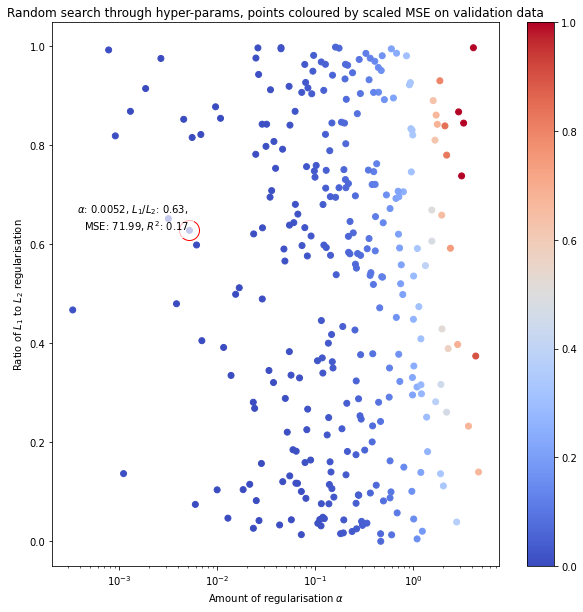

In [118]:
mean_mse = np.mean(np.array(mse_scores), axis=1)
mean_r2 = np.mean(np.array(r2_scores), axis=1)
scaled_means = (mean_mse - np.min(mean_mse)) / (np.max(mean_mse) - np.min(mean_mse))
arg_min = np.argmin(scaled_means)

plt.figure(figsize=(10,10))
plt.scatter(alphas, l1_ratios, c=scaled_means, cmap="coolwarm")
plt.xlabel("Amount of regularisation $ \\alpha $")
plt.ylabel("Ratio of $L_1$ to $L_2$ regularisation")
plt.xscale("log")
plt.title("Random search through hyper-params, points coloured by scaled MSE on validation data")
plt.colorbar()

# highlight hyper-params with min MSE
a, l1 = alphas[arg_min], l1_ratios[arg_min]
t = plt.text(a,l1,
             f"$\\alpha$: {np.round(a,4)}, $L_1/L_2$: {np.round(l1,2)}, \nMSE: {np.round(mean_mse[arg_min],2)}, $R^2$: {np.round(mean_r2[arg_max],2)}",
            ha = "right")
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='white'))
plt.plot(a,l1,"ro",mfc='none',markersize=20)

plt.show()


Since a model with relative low amounts of regularisaiton performs best, how does this compare to just vanilla linear regression?

In [127]:
r2_score(np.mean(y_train)*np.ones(len(y_train)),y_train)

-2.747940301489441e+29

In [126]:
clf = ElasticNet(alpha=alphas[arg_min], l1_ratio=l1_ratios[arg_min]).fit(X_train, y_train)
preds = clf.predict(X_val)

-2.747940301489441e+29

In [124]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a :math:`R^2` score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_o